In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 2.1

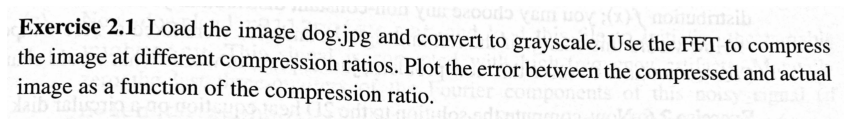

In [2]:
plt.figure(figsize=(15,5))
plt.imshow(plt.imread('./ex2.1.png'))
plt.axis('off');

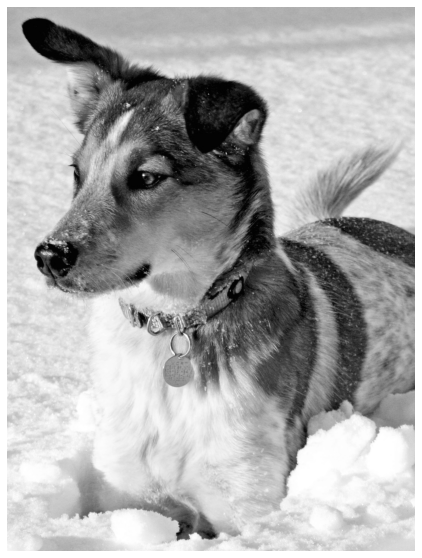

In [3]:
DOG = plt.imread('../DATA/dog.jpg')
DOG = np.mean(DOG, -1) #convert RGB to grayscale
plt.figure(figsize=(15,10))
plt.imshow(DOG, cmap='gray')
plt.axis('off');

In [4]:
DOG_fft = np.fft.fft2(DOG)
DOG_fftsort = np.sort(np.abs(DOG_fft.reshape(-1)))

In [5]:
error = []

for keep in range(1,101):
    thresh = DOG_fftsort[int(np.floor((1-keep/100)*len(DOG_fftsort)))]
    ind = np.abs(DOG_fft)>thresh          # Find small indices
    DOG_fftlow = DOG_fft * ind                 # Threshold small indices
    DOG_low = np.fft.ifft2(DOG_fftlow).real  # Compressed image
    error.append(((DOG - DOG_low)**2).mean())

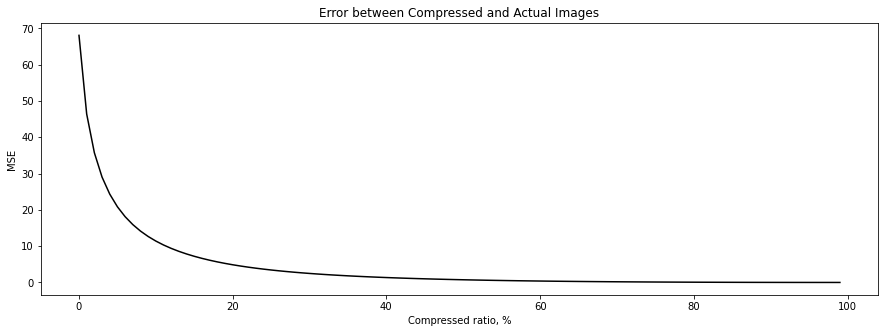

In [6]:
plt.figure(figsize=(15,5))
plt.plot(error, color='black')
plt.xlabel('Compressed ratio, %')
plt.ylabel('MSE')
plt.title('Error between Compressed and Actual Images');

# Exercise 2.2

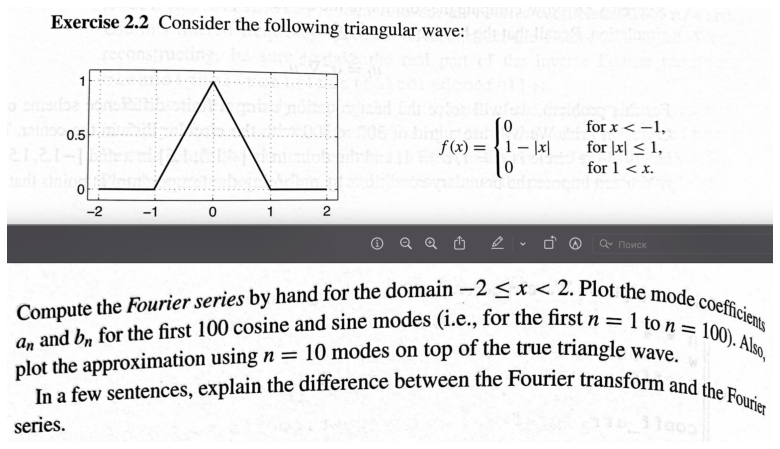

In [7]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./ex2.2.png'))
plt.axis('off');

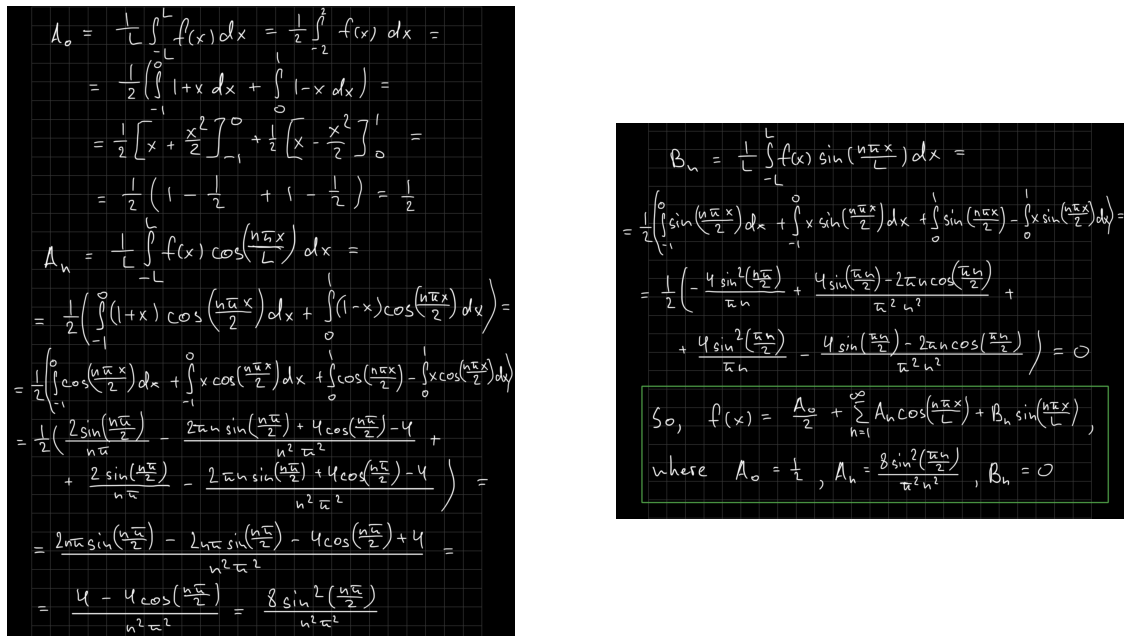

In [8]:
f, ax = plt.subplots(1,2,figsize=(20,15))

ax[0].imshow(plt.imread('A0_An.jpeg')) 
ax[0].axis('off');
ax[1].imshow(plt.imread('Bn_solution.jpeg')) 
ax[1].axis('off');

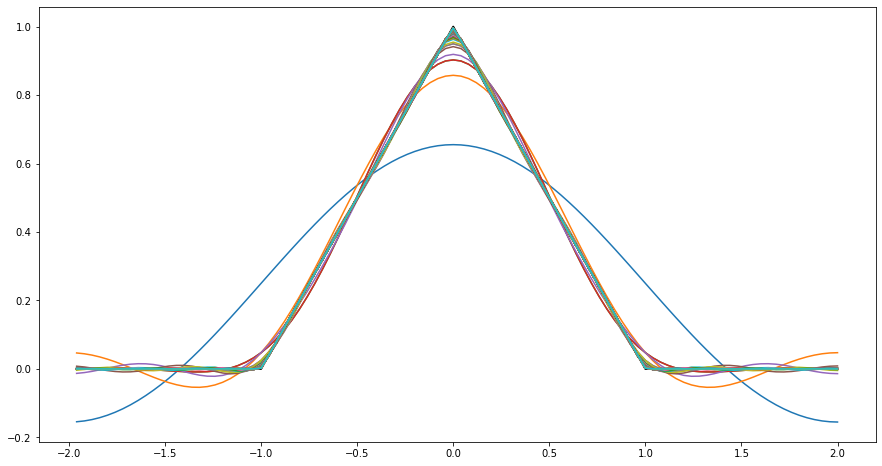

In [9]:
dx = 0.02
L = 2
x = L * np.arange(-1+dx,1+dx,dx)
n = 100
nquart = int(np.floor(n/4))

f = np.zeros_like(x)
for l in range(nquart,3*nquart - 1):
    f[l] = 1-np.abs(x[l])

A0 = 1/4
An = np.zeros(n)
Bn = 0
fFS = A0
    
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x,f,'-',color='k',linewidth=2)
name = "Accent"
cmap = plt.get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

for k in range(n):
    An[k] = (4-4*np.cos((np.pi*(k+1))/2))/((np.pi**2)*((k+1)**2))
    fFS = fFS + An[k]*np.cos(((k+1)*np.pi*x)/L) + Bn*np.sin(((k+1)*np.pi*x)/L)
    ax.plot(x,fFS)

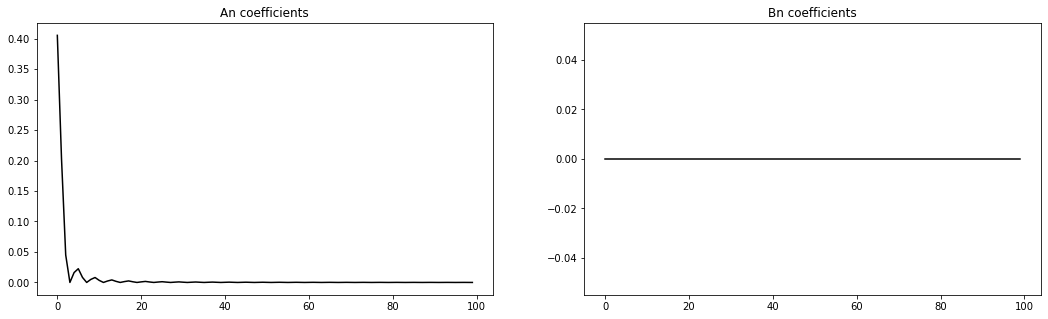

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

ax[0].plot(An, color='k')
ax[0].set_title('An coefficients')
ax[1].plot(np.zeros(100), color='k')
ax[1].set_title('Bn coefficients');

The Fourier series is used to define a preiodic function by a discrete sum of complex exponentials and in a specified domain of definition. Outside of that domain and as it goes to infinity, we have the Fourier Series Transform which is defined by an integral of complex exponentials, and is nonperiodic.